In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [29]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
X_train[2].shape

(28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

In [35]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Convert pixel to image

3


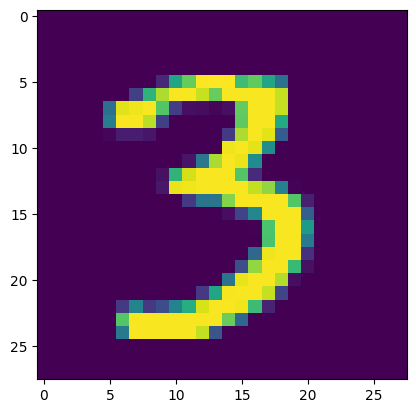

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10000])
print(y_train[10000])


The values of pixel are between 0 and 255 . This should be brought to similar range .this can be done by dividing the pixel values by 255.

In [68]:
X_train = X_train/255
X_test =  X_test/255

Building model using ANN

In [110]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [111]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [113]:
history = model.fit(X_train,y_train,epochs = 50,validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0137 - accuracy: 0.6733 - val_loss: 0.5645 - val_accuracy: 0.8302
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4983 - accuracy: 0.8487 - val_loss: 0.3936 - val_accuracy: 0.8853
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3900 - accuracy: 0.8861 - val_loss: 0.3365 - val_accuracy: 0.9027
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3477 - accuracy: 0.8994 - val_loss: 0.3199 - val_accuracy: 0.9078
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.9071 - val_loss: 0.2908 - val_accuracy: 0.9161
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.9130 - val_loss: 0.2751 - val_accuracy: 0.9202
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2770 - accuracy: 0.9194 - val_loss: 0.2581 - val_accuracy:

In [114]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 928us/step


In [115]:
y_pred = y_prob.argmax(axis = 1)

In [96]:
for i in range(1,10):
    print(y_pred[i])

2
1
0
4
1
4
9
6
9


In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9696

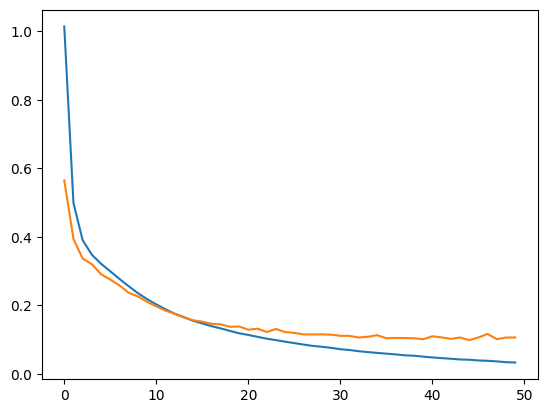

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

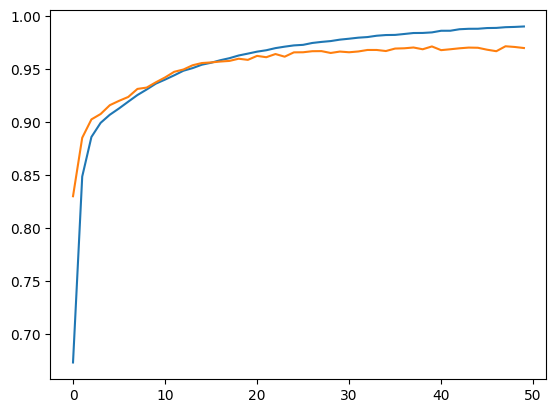

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

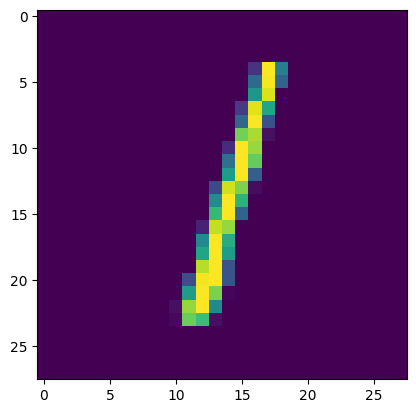

In [122]:
plt.imshow(X_test[2])

In [123]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([1], dtype=int64)